In [1]:
# https://wikidocs.net/57805

---
# 로지스틱 회귀(Logistic Regression)

In [4]:
# 이진 분류(binary classification)
# 시험 성적에 따라 합격, 불합격이 기재된 데이터를 가지고 특정 점수를 얻었을 때 합격 여부를 판정하는 모델을 만들자
# 이 모델을 만들기 위해서는 S자 모양 그래프를 그릴 수 있는 함수가 필요한데, 바로 sigmoid이다.

In [19]:
# matplotlib으로 sigmoid 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1/(1+np.exp(-x))

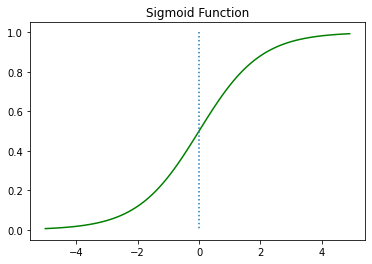

In [26]:
# W = 1 , b = 0 인 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)   # -0.5 ~ 5.0 까지 0.1의 간격으로 데이터 만들기
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

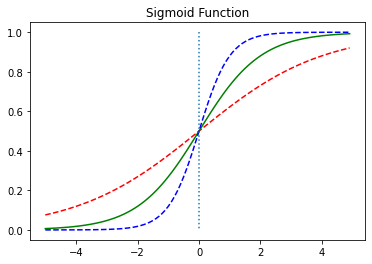

In [27]:
# W 값의 변화에 따른 경사도의 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

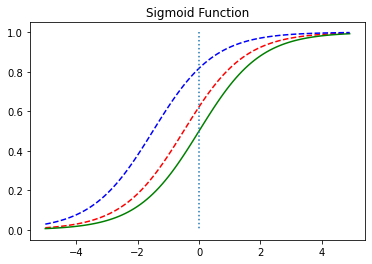

In [29]:
# b값의 변화에 따른 좌, 우 이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

---
### 로지스틱 회귀 구현하기

In [2]:
# 라이브러리
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# 랜덤시드 고정
torch.manual_seed(1)

In [6]:
# x_train, y_train 데이터를 텐서로 선언
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [7]:
# w 와 b 선언
# x는 (6,2) y는 (6,1) 이므로 w는 (2,1)이 되어야 함
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
# 가설식 세우기
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(w) + b)))

In [9]:
# 현재 w와 b는 0으로 초기화 된 상태. 이 상태에서 예측값을 출력해보자
print(hypothesis)

# y의 크기인 (6,1)과 같은 크기가 나온다.

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [10]:
# 8번 셀의 가설식을 토치에서 제공하는 시그모이드 함수로 더 간단히 구현 할 수 있다.
hypothesis = torch.sigmoid(x_train.matmul(w) + b )

In [11]:
# 똑같이 예측값을 출력해보자
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [12]:
# 현재 예측값과 실제값 사이의 cost를 구해보자

print('현재 예측값: \n', hypothesis)
print('실제값: \n', y_train)

현재 예측값: 
 tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
실제값: 
 tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [13]:
# 하나의 원소에 대해서 오차를 구하는 식을 작성해보자
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [14]:
# 모든 원소에 대해서 오차를 구해보자
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [15]:
# 이 전체 오차에 대한 평균을 구하자
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [16]:
# 이 비용 함수도 torch에서 torch.nn.functional.binary_cross_entropy(예측값, 실제값)으로 제공을 한다.
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

---

In [17]:
# 위에서 배운 내용을 토대로 훈련까지 추가한 전체 코드를 작성하자

In [18]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [20]:
# 모델 초기화
w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([w,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(w) + b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번 마다 로그 출력
    if epoch % 100 == 0 :
        print('Epoch {:4}/{}  Cost {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000  Cost 0.693147
Epoch  100/1000  Cost 0.134722
Epoch  200/1000  Cost 0.080643
Epoch  300/1000  Cost 0.057900
Epoch  400/1000  Cost 0.045300
Epoch  500/1000  Cost 0.037261
Epoch  600/1000  Cost 0.031673
Epoch  700/1000  Cost 0.027556
Epoch  800/1000  Cost 0.024394
Epoch  900/1000  Cost 0.021888
Epoch 1000/1000  Cost 0.019852


In [26]:
# 현재 w 와 b는 훈련 후 갱신된 값을 가지고 있다.
# 입력으로 넣었던 데이터를 가지고 와서 예측을 해보자

print(w)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


In [23]:
hypothesis = torch.sigmoid(x_train.matmul(w) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [24]:
# 나온 값들을 0.5 미만이면 True, 넘으면 False로 정하여 출력하자
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [25]:
# 이 값은 0,0,0,1,1,1 과 같으므로 실제 y_train과 값이 같다.